<a href="https://colab.research.google.com/github/edypidy/SkyElephant-not-a-FlyingElephant/blob/main/MyLab/CLAHE_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [36]:
def H(p):
    id_p = np.where(p != 0)
    return -np.sum(p[id_p]*np.log(p[id_p]))


def gridEntropyMap(img, gs=10):

    m = img.shape[0]//gs
    n = img.shape[1]//gs

    H_img = [[0]*n for _ in range(m)]

    for i in range(m):
        for j in range(n):
            p = img[i*gs:(i+1)*gs, j*gs:(j+1)*gs]
            p = cv2.calcHist([p], [0], None, [256], [0, 255])
            H_img[i][j] = H(p/sum(p))
    
    return H_img

In [1]:
path = 'CXR_image.jpg'

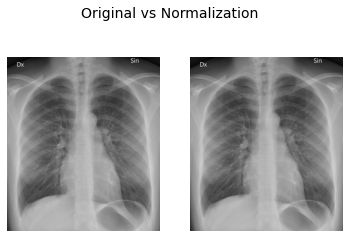

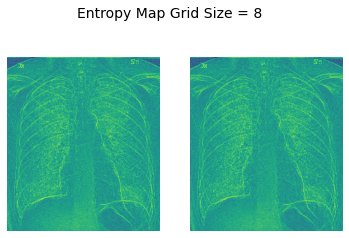

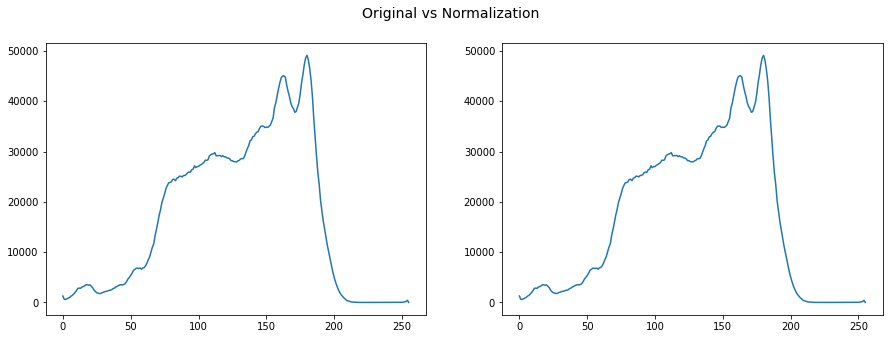

[5.038825, 5.038825]


In [125]:
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

for i, image in enumerate([img, img_norm]):
    plt.subplot(1,2,i+1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
plt.suptitle("Original vs Normalization", fontsize=14)
plt.show()


gs = 8
H_img = gridEntropyMap(img, gs=gs)
H_img_norm = gridEntropyMap(img_norm, gs=gs)

for i, image in enumerate([H_img, H_img_norm]):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.axis('off')
plt.suptitle(f'Entropy Map Grid Size = {gs}', fontsize=14)
# plt.colorbar()
plt.show()


hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])

H_list = []
plt.figure(figsize=(15,5))
for i, h in enumerate([hist, hist_norm]):
    H_list.append(H(h/sum(h)))
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.suptitle("Original vs Normalization", fontsize=14)
plt.show()
print(H_list)

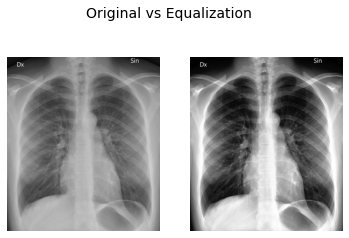

<ipython-input-120-a6d7f5da301d>:12: RuntimeWarning: invalid value encountered in true_divide
  H_img[i][j] = H(p/sum(p))


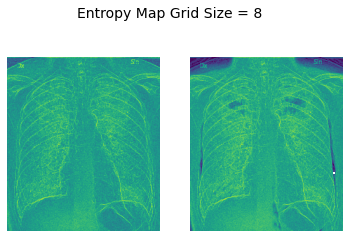

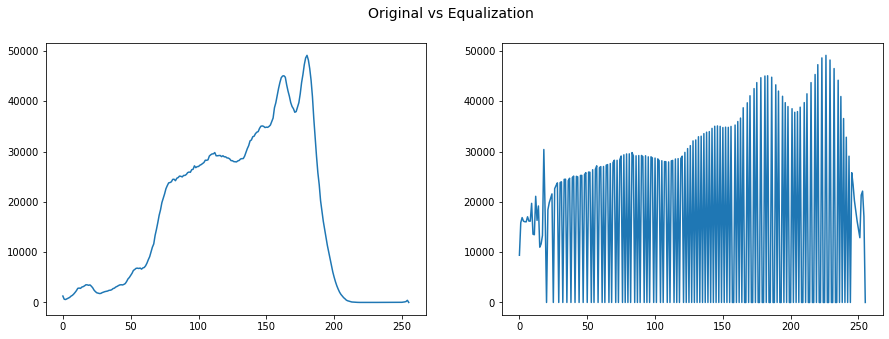

[5.038825, 4.934513]


In [126]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_equalized = cv2.equalizeHist(img)

for i, image in enumerate([img, img_equalized]):
    plt.subplot(1,2,i+1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
plt.suptitle("Original vs Equalization", fontsize=14)
plt.show()


gs = 8
H_img = gridEntropyMap(img, gs=gs)
H_img_equalized = gridEntropyMap(img_equalized, gs=gs)

for i, image in enumerate([H_img, H_img_equalized]):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.axis('off')
plt.suptitle(f'Entropy Map Grid Size = {gs}', fontsize=14)
# plt.colorbar()
plt.show()


hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0, 255])

H_list = []
plt.figure(figsize=(15,5))
for i, h in enumerate([hist, hist_equalized]):
    H_list.append(H(h/sum(h)))
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.suptitle("Original vs Equalization", fontsize=14)
plt.show()
print(H_list)

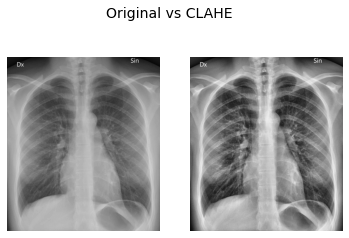

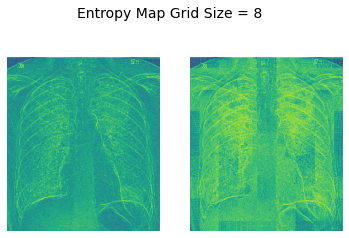

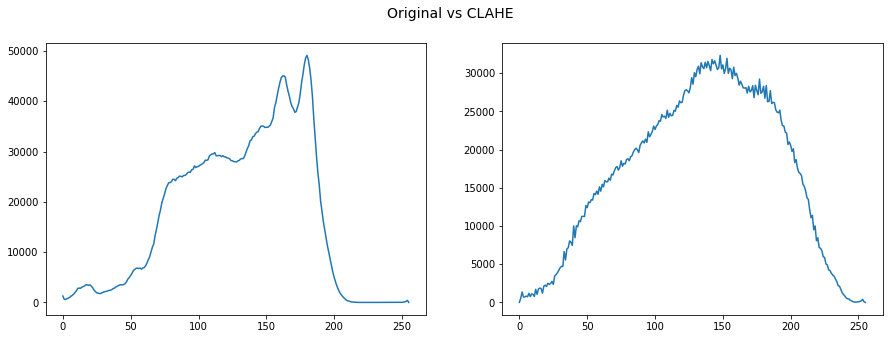

[5.038825, 5.2822533]


In [130]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

for i, image in enumerate([img, img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()


gs = 8
H_img = gridEntropyMap(img, gs=gs)
H_img_clahe = gridEntropyMap(img_clahe, gs=gs)

for i, image in enumerate([H_img, H_img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.axis('off')
plt.suptitle(f'Entropy Map Grid Size = {gs}', fontsize=14)
# plt.colorbar()
plt.show()


hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_clahe = cv2.calcHist([img_clahe], [0], None, [256], [0, 255])

H_list = []
plt.figure(figsize=(15,5))
for i, h in enumerate([hist, hist_clahe]):
    H_list.append(H(h/sum(h)))
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()
print(H_list)

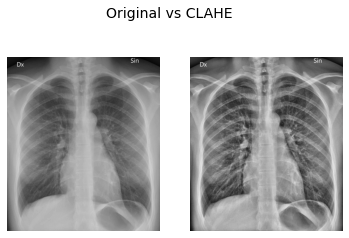

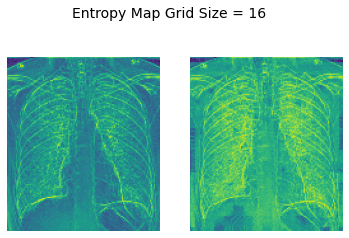

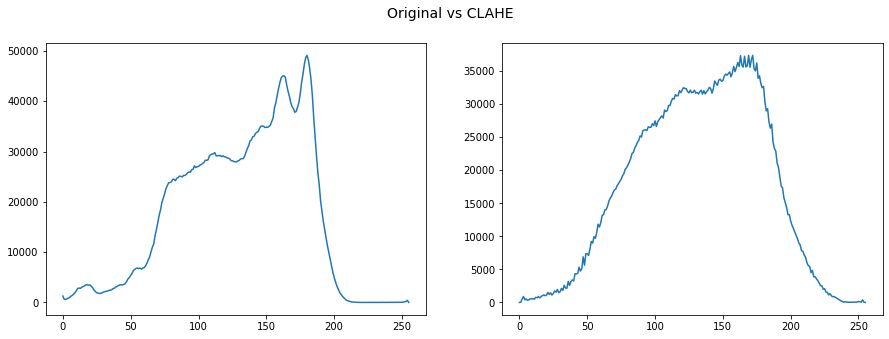

[5.038825, 5.143636]


In [132]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
img_clahe = clahe.apply(img)

for i, image in enumerate([img, img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()


gs = 16
H_img = gridEntropyMap(img, gs=gs)
H_img_clahe = gridEntropyMap(img_clahe, gs=gs)

for i, image in enumerate([H_img, H_img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.axis('off')
plt.suptitle(f'Entropy Map Grid Size = {gs}', fontsize=14)
# plt.colorbar()
plt.show()


hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_clahe = cv2.calcHist([img_clahe], [0], None, [256], [0, 255])

H_list = []
plt.figure(figsize=(15,5))
for i, h in enumerate([hist, hist_clahe]):
    H_list.append(H(h/sum(h)))
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()
print(H_list)

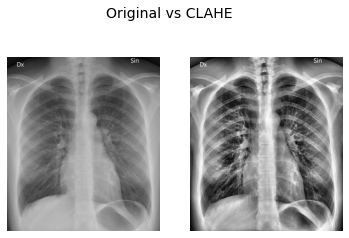

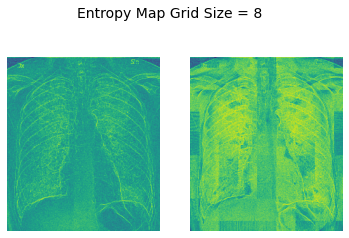

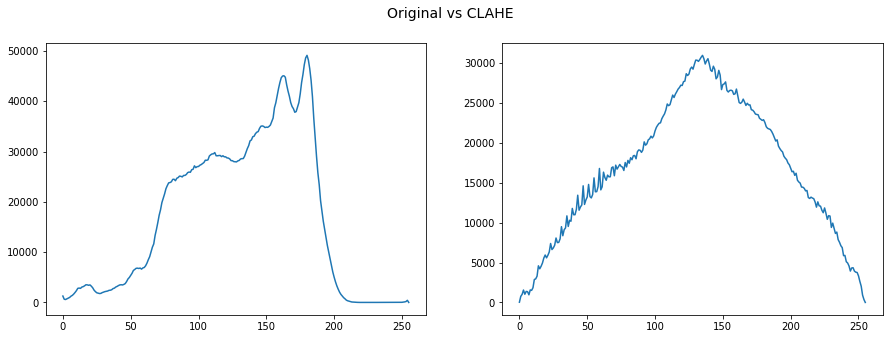

[5.038825, 5.390184]


In [133]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

for i, image in enumerate([img, img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()


gs = 8
H_img = gridEntropyMap(img, gs=gs)
H_img_clahe = gridEntropyMap(img_clahe, gs=gs)

for i, image in enumerate([H_img, H_img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.axis('off')
plt.suptitle(f'Entropy Map Grid Size = {gs}', fontsize=14)
# plt.colorbar()
plt.show()


hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_clahe = cv2.calcHist([img_clahe], [0], None, [256], [0, 255])

H_list = []
plt.figure(figsize=(15,5))
for i, h in enumerate([hist, hist_clahe]):
    H_list.append(H(h/sum(h)))
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()
print(H_list)

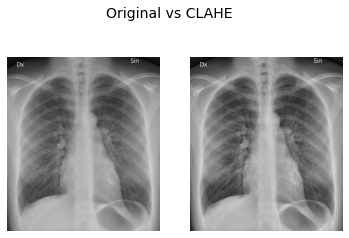

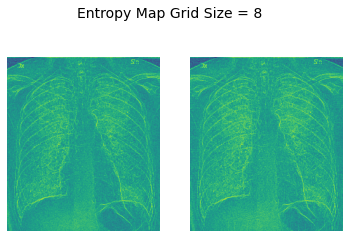

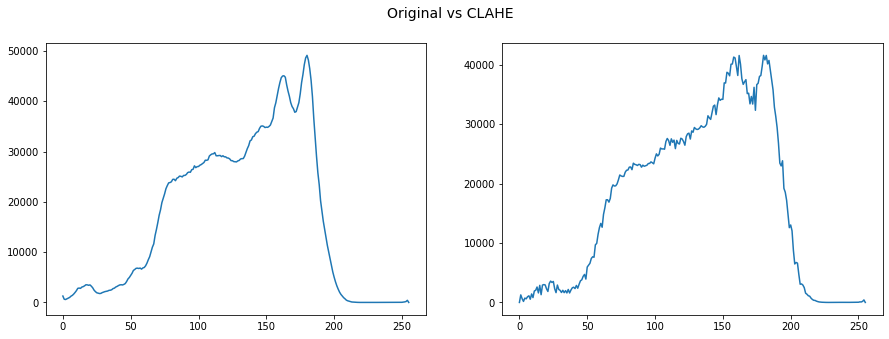

[5.038825, 5.0925646]


In [136]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

for i, image in enumerate([img, img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()


gs = 8
H_img = gridEntropyMap(img, gs=gs)
H_img_clahe = gridEntropyMap(img_clahe, gs=gs)

for i, image in enumerate([H_img, H_img_clahe]):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.axis('off')
plt.suptitle(f'Entropy Map Grid Size = {gs}', fontsize=14)
# plt.colorbar()
plt.show()


hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_clahe = cv2.calcHist([img_clahe], [0], None, [256], [0, 255])

H_list = []
plt.figure(figsize=(15,5))
for i, h in enumerate([hist, hist_clahe]):
    H_list.append(H(h/sum(h)))
    plt.subplot(1,2,i+1)
    plt.plot(h)
plt.suptitle("Original vs CLAHE", fontsize=14)
plt.show()
print(H_list)

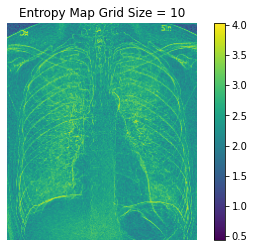

(220, 192)

In [120]:
gs = 10
H_img = gridEntropyMap(img, gs=gs)
plt.imshow(H_img)
plt.colorbar()
plt.axis('off')
plt.title(f'Entropy Map Grid Size = {gs}')
plt.show()

np.array(H_img).shape

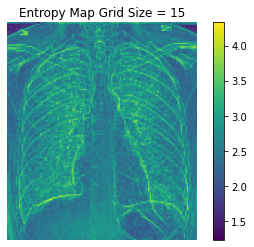

(147, 128)

In [121]:
gs = 15
H_img = gridEntropyMap(img, gs=gs)
plt.imshow(H_img)
plt.colorbar()
plt.axis('off')
plt.title(f'Entropy Map Grid Size = {gs}')
plt.show()

np.array(H_img).shape